In [95]:
import os
import numpy as np
import pandas as pd
import plotly as pl
import plotly.express as px
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.stats as sts
import seaborn as sns
import math
import pylab
import random
from sklearn import linear_model

In [96]:
data = pd.read_csv("Video_Games_Sales_as_at_22_Dec_2016.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


In [97]:
data = data.dropna(subset=['Name'])
data = data.dropna(subset=['Genre'])

{'Sports': 2348, 'Platform': 888, 'Racing': 1249, 'Role-Playing': 1500, 'Puzzle': 580, 'Misc': 1750, 'Shooter': 1323, 'Simulation': 874, 'Action': 3370, 'Fighting': 849, 'Adventure': 1303, 'Strategy': 683}


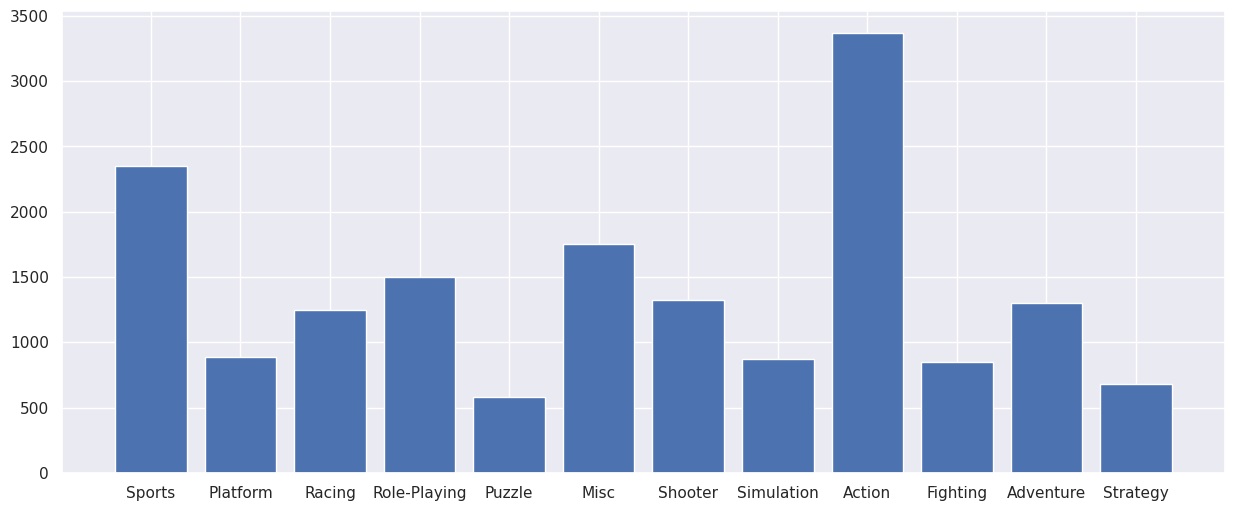

In [98]:
genres = {}

for index, row in data.iterrows():
    if row["Genre"] in genres:
        genres[row["Genre"]] += 1
    else:
        genres[row["Genre"]] = 1

print(genres)

plt.figure(figsize=(15, 6))
plt.bar(*zip(*genres.items()))
plt.show()

In [99]:
from sklearn.model_selection import train_test_split

predictors = pd.get_dummies(data.Name)
target = data.Genre

print(f"predict:\n{predictors.head(5)}")
print(f"target:\n{target.head(5)}")

predict:
    Beyblade Burst   Fire Emblem Fates   Frozen: Olaf's Quest  \
0                0                   0                      0   
1                0                   0                      0   
2                0                   0                      0   
3                0                   0                      0   
4                0                   0                      0   

    Haikyu!! Cross Team Match!   Tales of Xillia 2  '98 Koshien  \
0                            0                   0            0   
1                            0                   0            0   
2                            0                   0            0   
3                            0                   0            0   
4                            0                   0            0   

   .hack//G.U. Vol.1//Rebirth  .hack//G.U. Vol.2//Reminisce  \
0                           0                             0   
1                           0                             0   
2       

In [122]:
from datetime import datetime
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC


x_train, x_test, y_train, y_test = train_test_split(predictors, target, train_size=0.8, shuffle=True, random_state=271)

print(f"Size x_train: {x_train.shape}")
print(f"Size x_test: {x_test.shape}")
print(f"Size y_train: {y_train.shape}")
print(f"Size y_test: {y_test.shape}")

def print_res(y_predict, y_test, start, end):
    print(f"regression time: {end-start}")
    print(f"y_predict:\n {y_predict[:20]}")
    print(f"y_test:\n {np.array(y_test[:20])}\n")
    print(classification_report(y_test, y_predict))

    #sns.heatmap(confusion_matrix(y_test, y_predict), annot=True, fmt="", ax=ax, cbar=False)
    z = confusion_matrix(y_test, y_predict)
    fig = px.imshow(z, x=list(genres.keys()), y=list(genres.keys()), text_auto=True, aspect="auto", labels=dict(x="<b>predict</b>", y="<b>real</b>", color="Productivity"))
    fig.update_layout(title_text='<i><b>LogisticRegression</b></i>',
                      #xaxis = dict(title='x'),
                      #yaxis = dict(title='x')
                      )
    fig.show()

Size x_train: (13373, 11562)
Size x_test: (3344, 11562)
Size y_train: (13373,)
Size y_test: (3344,)


In [125]:
# Применить алгоритмы классификации: логистическая регрессия, SVM, KNN. Построить матрицу ошибок по результатам работы моделей (использовать confusion_matrix из sklearn.metrics).

model = LogisticRegression(random_state=271)
start = datetime.now()
model.fit(x_train, y_train)
end = datetime.now()
y_predict = model.predict(x_test)

In [126]:
print_res(y_predict, y_test, start, end)

regression time: 0:00:46.286599
y_predict:
 ['Action' 'Action' 'Adventure' 'Action' 'Action' 'Racing' 'Shooter'
 'Action' 'Role-Playing' 'Action' 'Misc' 'Action' 'Misc' 'Racing' 'Action'
 'Racing' 'Action' 'Action' 'Action' 'Action']
y_test:
 ['Fighting' 'Adventure' 'Adventure' 'Action' 'Adventure' 'Racing'
 'Shooter' 'Sports' 'Role-Playing' 'Racing' 'Misc' 'Misc' 'Misc' 'Racing'
 'Action' 'Racing' 'Misc' 'Action' 'Shooter' 'Action']

              precision    recall  f1-score   support

      Action       0.26      1.00      0.42       645
   Adventure       1.00      0.26      0.41       258
    Fighting       1.00      0.16      0.28       147
        Misc       1.00      0.34      0.51       375
    Platform       1.00      0.25      0.40       209
      Puzzle       1.00      0.04      0.07       107
      Racing       1.00      0.52      0.68       277
Role-Playing       1.00      0.29      0.45       296
     Shooter       0.99      0.51      0.68       255
  Simulation       1

In [129]:
# SVM method


model = LinearSVC(random_state=271)
start = datetime.now()
model.fit(x_train, y_train)
end = datetime.now()
y_predict = model.predict(x_test)


In [130]:
print_res(y_predict, y_test, start, end)

regression time: 0:00:02.122380
y_predict:
 ['Action' 'Action' 'Adventure' 'Action' 'Action' 'Racing' 'Shooter'
 'Action' 'Role-Playing' 'Action' 'Misc' 'Action' 'Misc' 'Racing' 'Action'
 'Racing' 'Action' 'Action' 'Action' 'Action']
y_test:
 ['Fighting' 'Adventure' 'Adventure' 'Action' 'Adventure' 'Racing'
 'Shooter' 'Sports' 'Role-Playing' 'Racing' 'Misc' 'Misc' 'Misc' 'Racing'
 'Action' 'Racing' 'Misc' 'Action' 'Shooter' 'Action']

              precision    recall  f1-score   support

      Action       0.28      1.00      0.44       645
   Adventure       1.00      0.26      0.41       258
    Fighting       1.00      0.37      0.54       147
        Misc       1.00      0.34      0.51       375
    Platform       1.00      0.43      0.60       209
      Puzzle       1.00      0.18      0.30       107
      Racing       1.00      0.52      0.68       277
Role-Playing       1.00      0.29      0.45       296
     Shooter       0.99      0.51      0.68       255
  Simulation       1

In [131]:
# KNN method
model = KNeighborsClassifier()
start = datetime.now()
model.fit(x_train, y_train)
end = datetime.now()
y_predict = model.predict(x_test)

/home/fume/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.



In [132]:
print_res(y_predict, y_test, start, end)

regression time: 0:00:00.082617
y_predict:
 ['Fighting' 'Fighting' 'Adventure' 'Action' 'Fighting' 'Misc' 'Shooter'
 'Fighting' 'Fighting' 'Fighting' 'Misc' 'Fighting' 'Fighting' 'Fighting'
 'Action' 'Racing' 'Fighting' 'Action' 'Fighting' 'Action']
y_test:
 ['Fighting' 'Adventure' 'Adventure' 'Action' 'Adventure' 'Racing'
 'Shooter' 'Sports' 'Role-Playing' 'Racing' 'Misc' 'Misc' 'Misc' 'Racing'
 'Action' 'Racing' 'Misc' 'Action' 'Shooter' 'Action']

              precision    recall  f1-score   support

      Action       0.98      0.49      0.65       645
   Adventure       1.00      0.19      0.32       258
    Fighting       0.07      1.00      0.12       147
        Misc       0.81      0.25      0.39       375
    Platform       1.00      0.25      0.40       209
      Puzzle       1.00      0.03      0.05       107
      Racing       1.00      0.28      0.44       277
Role-Playing       0.30      0.24      0.27       296
     Shooter       0.98      0.24      0.38       255
  Si